In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
from matplotlib import ticker
import geopandas

In [2]:
df=pd.read_csv('DATA/lnas/aj_df.csv')
mb_bound=np.load('DATA/lnas/main_basin_bound.npy')
rb_bound=np.load('DATA/lnas/river_basin_bound.npy')
df_build_fac = geopandas.read_file('DATA/bld_sc/bldPort_TV0_siteclasses.shp')

[]

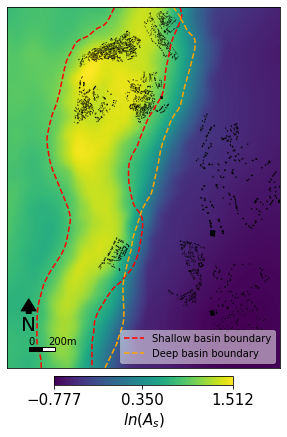

In [3]:


fig,ax=plt.subplots(1,1,figsize=(8,8))
plt.rc('font',size=15)
extent=(np.min(df.x),np.max(df.x),np.min(df.y),np.max(df.y))

plt.scatter(df.x,df.y,c=df.aj)
aj_plot=np.flipud(np.transpose(df.aj.values.reshape(100,100)))
plt.imshow(aj_plot,extent=extent,zorder=1,aspect=1.0)
cbar=plt.colorbar(shrink=0.4,orientation='horizontal',pad=0.02,ticks=[np.min(aj_plot),0.350,np.max(aj_plot)])
cbar.set_label(r'$ln(A_{s})$')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
df_build_fac.plot(ax=ax,color='black',zorder=2)

plt.plot(rb_bound[0],rb_bound[1],color='red',label='Shallow basin boundary',linestyle='dashed')
plt.plot(mb_bound[0],mb_bound[1],color='orange',label='Deep basin boundary',linestyle='dashed')
plt.legend(fontsize=10,framealpha=0.5,loc='lower right')

rect = patches.Rectangle((332800, 3056000), 100, 30, linewidth=1, edgecolor='black', facecolor='black',zorder=2)
ax.add_patch(rect)
rect2 = patches.Rectangle((332900, 3056000), 100, 30, linewidth=1, edgecolor='black', facecolor='white',zorder=3)
ax.add_patch(rect2)

ax.text(332800,3056045,'0',c='black',fontsize=10)
ax.text(332950,3056045,'200m',c='black',fontsize=10)

x,y=332800, 3056400
arrow_length=200
ax.annotate('N', xy=(x,y ), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
